In [1]:
from pycaret.utils import check_metric
from pycaret.regression import *
import pandas as pd
from pycaret.classification import *
import streamlit as st
from sklearn.model_selection import train_test_split
import xgboost as xgb
from pycaret.datasets import get_data

در این قسمت اطلاعات دیتاست را فراخانی میکنیم

In [2]:
dataset = get_data('diabetes')
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


در این قسمت اطلاعات دیتاست را با استفاده از کتابخانه
pycaret
به دو دسته تقسیم میکنیم 95 
درصد از داده ها را برای یادگیری 
و 5 درصد از داده هارا برای تست تقسیم میکنیم

In [3]:
# sample 5% of data to be used as unseen data
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [4]:
# print the revised shape
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
data.head()


Data for Modeling: (730, 9)
Unseen Data For Predictions: (38, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,155,62,26,495,34.0,0.543,46,1
1,0,107,60,25,0,26.4,0.133,23,0
2,3,113,44,13,0,22.4,0.140,22,0
3,1,144,82,46,180,46.1,0.335,46,1
4,4,142,86,0,0,44.0,0.645,22,1


این تابع آزمایش را در PyCaret اولیه می کند و خط لوله تبدیل را بر اساس تمام پارامترهای ارسال شده در تابع آماده می کند. تابع setup باید قبل از اجرای هر تابع دیگری فراخوانی شود. این فقط به دو پارامتر نیاز دارد: داده و هدف. تمام پارامترهای دیگر اختیاری هستند.


در اینچا متغیر best_model تمام الگوریتم هارا مقایسه کرده
و از نظر بهینگی سرعت برای ما سورت میکند


In [5]:
# clf = setup(data, target='Outcome')
s = setup(data=data, target='Outcome', session_id=123)
best_model = compare_models(fold=5)
#best_model


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7686,0.8225,0.5835,0.7087,0.6294,0.4666,0.4776,0.0460
lightgbm,Light Gradient Boosting Machine,0.7686,0.8154,0.6398,0.6800,0.6529,0.4815,0.4866,0.0120
ada,Ada Boost Classifier,0.7667,0.8095,0.6110,0.6882,0.6438,0.4721,0.4765,0.0140
gbc,Gradient Boosting Classifier,0.7588,0.8274,0.6056,0.6705,0.6327,0.4550,0.4589,0.0160
et,Extra Trees Classifier,0.7588,0.8196,0.5830,0.6800,0.6241,0.4494,0.4546,0.0320
ridge,Ridge Classifier,0.7569,0.0000,0.5268,0.7026,0.5953,0.4292,0.4417,0.0040
xgboost,Extreme Gradient Boosting,0.7549,0.8095,0.6627,0.6429,0.6461,0.4606,0.4659,0.0160
lda,Linear Discriminant Analysis,0.7510,0.8219,0.5325,0.6863,0.5913,0.4193,0.4308,0.0060
lr,Logistic Regression,0.7490,0.8197,0.5325,0.6809,0.5898,0.4156,0.4263,0.2180
qda,Quadratic Discriminant Analysis,0.7333,0.8029,0.5606,0.6285,0.5901,0.3948,0.3975,0.0040


#Random Forest
در این قسمت با بهره گیری از کتابخانه pycaret
از الگوریتم random forest برای کلاسیفای کردن مدل استفاده میکنیم

و با استفاده از متد tune_model()
مدل را بهبود میبخشیم 

In [6]:
rf = create_model('rf')
tuned_rf = tune_model(rf)
# finalize rf model
final_rf = finalize_model(tuned_rf)
predict_model(final_rf)
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7368,0.7290,0.6000,0.6923,0.6429,0.4362,0.4390


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
0,5,116,74,0,0,25.600000,0.201,30,0,0,0.87
1,1,146,56,0,0,29.700001,0.564,29,0,1,0.69
2,7,103,66,32,0,39.099998,0.344,31,1,0,0.59
3,1,71,48,18,76,20.400000,0.323,22,0,0,1.00
4,2,107,74,30,100,33.599998,0.404,23,0,0,0.91


متد check_metric
متدی است برای ارزیابی معیارهای طبقه بندی، رگرسیون و سری زمانی.

In [7]:
# check metric on unseen data
check_metric(unseen_predictions['Outcome'],
             unseen_predictions['prediction_label'], metric='Accuracy')

0.7368

در این مرحله نمودار ماتریکس پیچیدگی را بر اساس مدل تیون شده رسم میکنیم

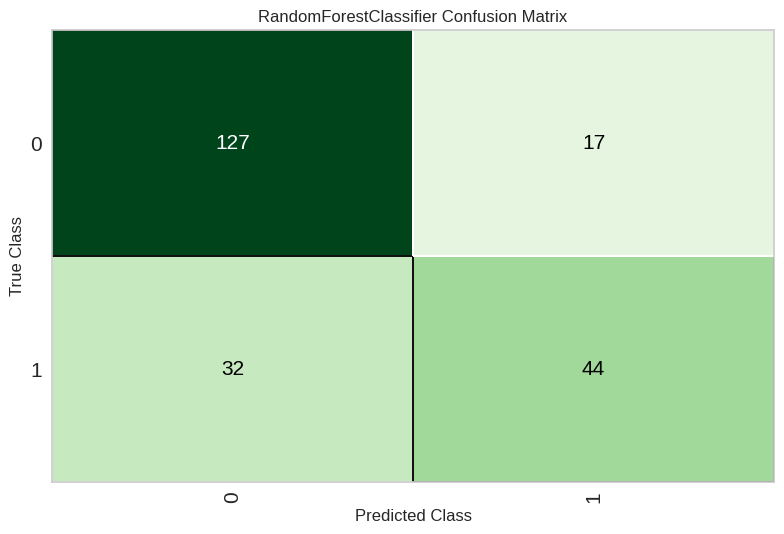

In [8]:
plot_model(tuned_rf, plot='confusion_matrix')

با استفاده از متد evaluate_models
میتوان بررسی ارزیابی عملکرد هر یک از الگوریتم ها با نشان دادن پلات آنها پرداخت

In [9]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

و در نهایت مدل یادگیری شده را ذخیره میکنیم

In [10]:
save_model(final_rf, model_name='final_model_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated')))...
                  RandomFore

#XGBOOST

In [11]:
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost)
plot_model(tuned_xgboost, plot='auc')
# finalize rf model
final_xg = finalize_model(tuned_xgboost)
# predict on new data
unseen_predictions_xg = predict_model(final_xg)
# unseen_predictions_xg.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


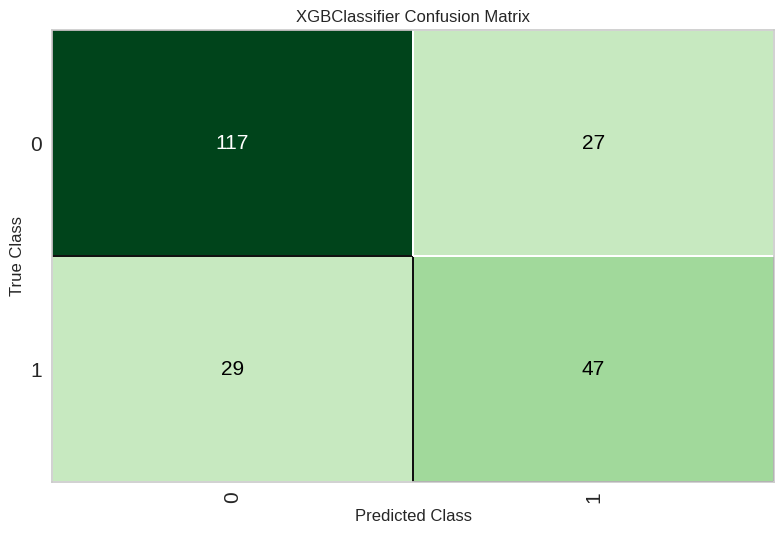

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated')))...
                            

In [12]:
# check metric on unseen data
check_metric(unseen_predictions_xg['Outcome'],
             unseen_predictions_xg['prediction_label'], metric='Accuracy')

plot_model(tuned_xgboost, plot='confusion_matrix')
evaluate_model(tuned_xgboost)

save_model(final_xg, model_name='final_model_xgb')